In [23]:
import pandas as pd

df = pd.read_csv('dataset/medical_insurance.csv')

print(df.columns) # Display the column names
print("\n") 
print("Available data types are:") 
print(df.dtypes) # Display the data types of each column
#print(df.head()) # Display the first 5 rows of the dataframe


df.isnull().sum() # Check for missing values


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Available data types are:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Exploratory Data Analysis (EDA)
# Identify the attributes that most affect medical charges
import matplotlib.pyplot as plt
import seaborn as sns

df.describe()


In [ ]:
# Pairwise correlation of columns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


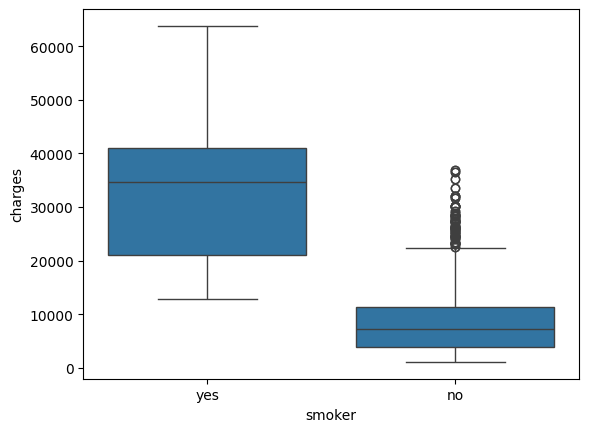

In [25]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()